In [106]:
%load_ext autoreload
%autoreload 2
import warnings 
warnings.filterwarnings('ignore')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
import pandas as pd 

file_path = '/Users/lenoxherman/Tippers/tipDataSet/tip.csv'
# Extract the CSV file from the zip archive

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)


In [108]:
df


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [109]:
from sklearn.preprocessing import LabelEncoder
import torch

le = LabelEncoder()
def prepare_data(df):
  #removing columns that are not needed
  # df.drop('smoker', axis=1, inplace=True)
  day_mapping = {'Sun': 1, 'Sat': 1, 'Fri': 1, 'Thur':0}
  # Create a new column 'day_encoded' based on Weekday or Weekend
  df['day_encoded'] = df['day'].map(day_mapping)
  # Create a new column "time_encoded" based on Lunch or Dinner
  df['time_encoded'] = le.fit_transform(df['time'])
  # Creates a new column 'smoker_encoded' based on Yes or No
  df['smoker_encoded'] = le.fit_transform(df['smoker'])
  # Creates a new column "sex_encoded'" based on female or male
  df['sex_encoded'] = le.fit_transform(df['sex'])
  # Creates a new column 'percent_tip' based on the percentage of the tip amount
  df['percent_tip'] = (df['tip'] / df['total_bill']) * 100
  # Round the 'percent_tip' column to two decimal places
  df['percent_tip'] = df['percent_tip'].round()
  #makes groups for tips to 25+
  tip_groups = [0, 10, 15, 20, 25, float('inf')]
  label_tip_groups = ['0-10%', '10-15%', '15-20%', '20-25%', '25+']
  df['tip_groups'] = pd.cut(df['percent_tip'], bins = tip_groups, labels= label_tip_groups)
  df['tip_groups'] = df['tip_groups'].astype(str)
  df['tip_groups'] = df['tip_groups'].str.extract(r'(\d+)').astype(float)

  le.fit(df["tip_groups"])
  #turns the labels in 'tip' to a number
  y = le.transform(df["tip_groups"])
  #print(y)
  #removing 'tip' col bc now held by y
  df = df.drop(["tip_groups"], axis = 1)

#drop tip, and percent_tip?

  #converted into “one-hot encoded” 0-1 columns
  df = pd.get_dummies(df)
  return df, y
X_train, y_train = prepare_data(df)

In [110]:
X_train.shape

(244, 18)

In [111]:
df

,total_bill,tip,sex,smoker,day,time,size,day_encoded,time_encoded,smoker_encoded,sex_encoded,percent_tip,tip_groups
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,0,0,6.0,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0,0,1,16.0,15.0
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0,0,1,17.0,15.0
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0,0,1,14.0,10.0
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,0,0,15.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0,0,1,20.0,15.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,0,1,0,7.0,0.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0,1,1,9.0,0.0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0,0,1,10.0,0.0


In [112]:
X_train

,total_bill,tip,size,day_encoded,time_encoded,smoker_encoded,sex_encoded,percent_tip,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1,0,0,0,6.0,True,False,True,False,False,False,True,False,True,False
1,10.34,1.66,3,1,0,0,1,16.0,False,True,True,False,False,False,True,False,True,False
2,21.01,3.50,3,1,0,0,1,17.0,False,True,True,False,False,False,True,False,True,False
3,23.68,3.31,2,1,0,0,1,14.0,False,True,True,False,False,False,True,False,True,False
4,24.59,3.61,4,1,0,0,0,15.0,True,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,20.0,False,True,True,False,False,True,False,False,True,False
240,27.18,2.00,2,1,0,1,0,7.0,True,False,False,True,False,True,False,False,True,False
241,22.67,2.00,2,1,0,1,1,9.0,False,True,False,True,False,True,False,False,True,False
242,17.82,1.75,2,1,0,0,1,10.0,False,True,True,False,False,True,False,False,True,False


## Visualizations

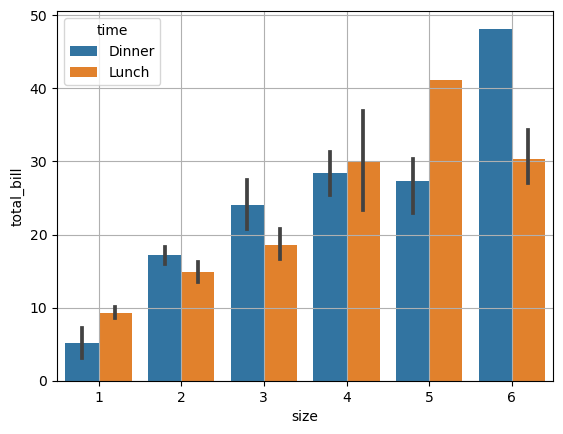

In [113]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.barplot(data = df, x = "size", y = "total_bill", hue = "time")

plt.title('')
plt.grid(True)
plt.show()

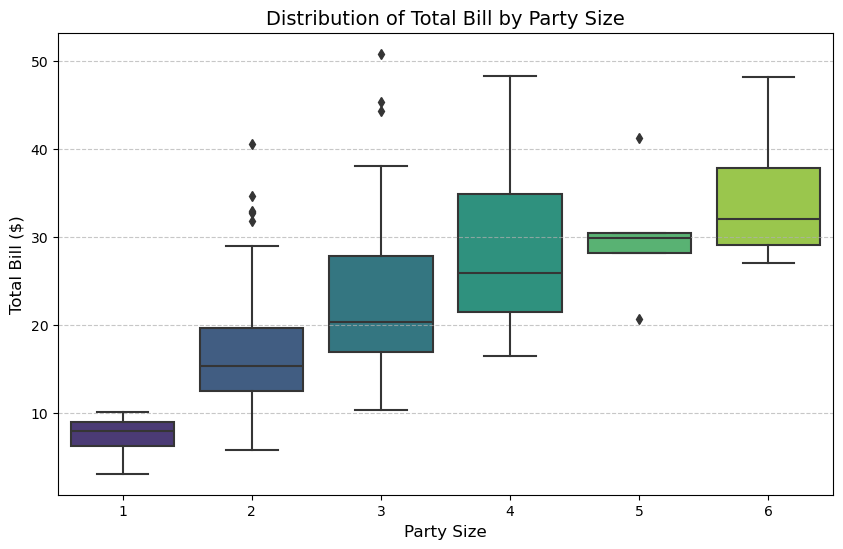

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='size', y='total_bill', data=df, palette='viridis')
plt.title('Distribution of Total Bill by Party Size', fontsize=14)
plt.xlabel('Party Size', fontsize=12)
plt.ylabel('Total Bill ($)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



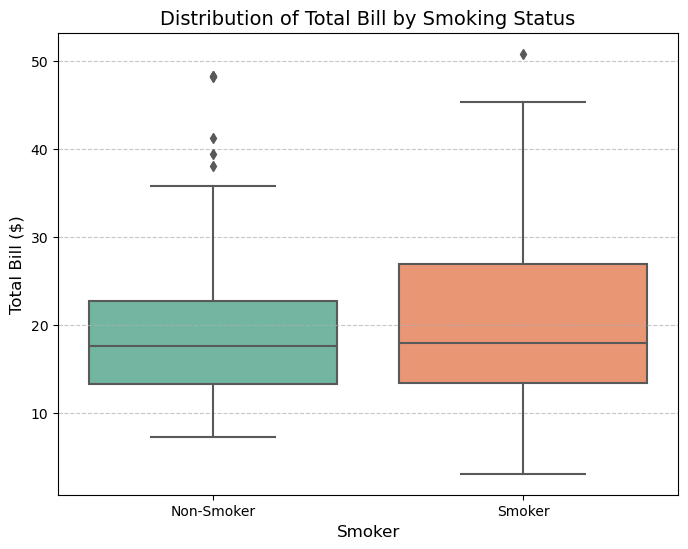

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='total_bill', data=df, palette='Set2')
plt.title('Distribution of Total Bill by Smoking Status', fontsize=14)
plt.xlabel('Smoker', fontsize=12)
plt.ylabel('Total Bill ($)', fontsize=12)
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'], fontsize=10)  # Customize x-axis labels
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


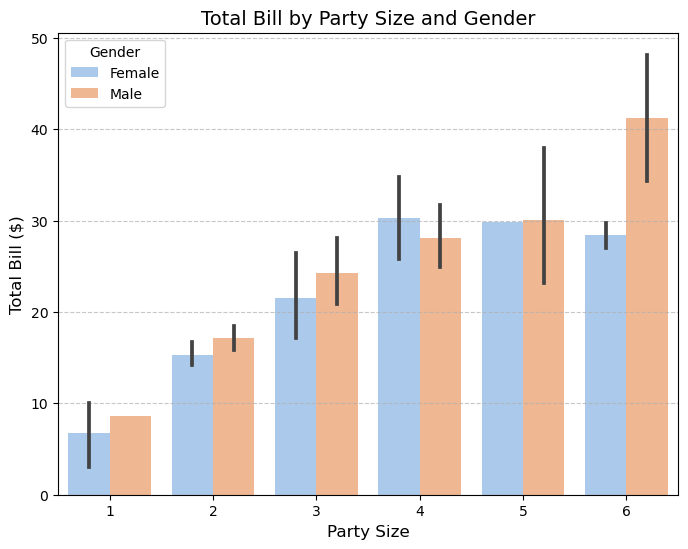

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='size', y='total_bill', hue='sex', data=df, palette='pastel')
plt.title('Total Bill by Party Size and Gender', fontsize=14)
plt.xlabel('Party Size', fontsize=12)
plt.ylabel('Total Bill ($)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Gender', fontsize=10, title_fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [117]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size = 0.2)

In [118]:
predictor_cols = ["size", "day_encoded", "time_encoded", "total_bill", "smoker_encoded",'sex_encoded']
target_col = ["tip_groups"]

X_train = df_train[predictor_cols]
y_train = df_train[target_col]

X_test = df_test[predictor_cols]
y_test = df_test[target_col]

In [119]:
print(df_train.shape)
print(df_test.shape)

(195, 13)
(49, 13)


# Basic Logistic Regression Score

### Basic Logistic Regression Score on Training Data

In [120]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

result = LR.fit(X_train, y_train)
LR.fit(X_train, y_train)
LR.score(X_train, y_train)

0.4512820512820513

### Basic Logistic Regression Score on Testing Data

In [121]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

result = LR.fit(X_test, y_test)
LR.fit(X_test, y_test)
LR.score(X_test, y_test)

0.5306122448979592

### Combination Logistic Regression Score on Training Data

In [122]:
from itertools import combinations
from sklearn.model_selection import cross_val_score

all_quan_cols = ["total_bill", "size", "day_encoded", "smoker_encoded", "sex_encoded", "time_encoded"]
all_qual_cols= ["sex", "smoker","day", "time"]

score_counter = 0

for qual in all_qual_cols:
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quan_cols, 3):
    cols = list(pair) + qual_cols
    print(cols)
    # training LR model and scoring it
    LR = LogisticRegression()
    #using cross validation on LR to avoid overfitting
    cv_scores_LR = cross_val_score(LR, X_train[cols], y_train, cv = 5) #training on remaining 80% of data

    if cv_scores_LR.mean() > score_counter:
      #updating the best score and columns of that score
      score_counter = cv_scores_LR.mean()
      col_best = cols

print('Best Score: ', score_counter)
print('Best Three Columns: ', col_best)

['total_bill', 'size', 'day_encoded', 'sex_encoded']
['total_bill', 'size', 'smoker_encoded', 'sex_encoded']
['total_bill', 'size', 'sex_encoded', 'sex_encoded']
['total_bill', 'size', 'time_encoded', 'sex_encoded']
['total_bill', 'day_encoded', 'smoker_encoded', 'sex_encoded']
['total_bill', 'day_encoded', 'sex_encoded', 'sex_encoded']
['total_bill', 'day_encoded', 'time_encoded', 'sex_encoded']
['total_bill', 'smoker_encoded', 'sex_encoded', 'sex_encoded']
['total_bill', 'smoker_encoded', 'time_encoded', 'sex_encoded']
['total_bill', 'sex_encoded', 'time_encoded', 'sex_encoded']
['size', 'day_encoded', 'smoker_encoded', 'sex_encoded']
['size', 'day_encoded', 'sex_encoded', 'sex_encoded']
['size', 'day_encoded', 'time_encoded', 'sex_encoded']
['size', 'smoker_encoded', 'sex_encoded', 'sex_encoded']
['size', 'smoker_encoded', 'time_encoded', 'sex_encoded']
['size', 'sex_encoded', 'time_encoded', 'sex_encoded']
['day_encoded', 'smoker_encoded', 'sex_encoded', 'sex_encoded']
['day_encode

### Combination Logistic Regression Score on Testing Data

In [123]:
from itertools import combinations
from sklearn.model_selection import cross_val_score

all_quan_cols = ["total_bill", "size", "day_encoded", "smoker_encoded", "sex_encoded", "time_encoded"]
all_qual_cols= ["sex", "smoker","day", "time"]

score_counter = 0

for qual in all_qual_cols:
  qual_cols = [col for col in X_test.columns if qual in col ]
  for pair in combinations(all_quan_cols, 3):
    cols = list(pair) + qual_cols
    print(cols)
    # training LR model and scoring it
    LR = LogisticRegression()
    #using cross validation on LR to avoid overfitting
    cv_scores_LR = cross_val_score(LR, X_test[cols], y_test, cv = 5) #training on remaining 80% of data

    if cv_scores_LR.mean() > score_counter:
      #updating the best score and columns of that score
      score_counter = cv_scores_LR.mean()
      col_best = cols

print('Best Score: ', score_counter)
print('Best Three Columns: ', col_best)

['total_bill', 'size', 'day_encoded', 'sex_encoded']
['total_bill', 'size', 'smoker_encoded', 'sex_encoded']
['total_bill', 'size', 'sex_encoded', 'sex_encoded']
['total_bill', 'size', 'time_encoded', 'sex_encoded']
['total_bill', 'day_encoded', 'smoker_encoded', 'sex_encoded']
['total_bill', 'day_encoded', 'sex_encoded', 'sex_encoded']
['total_bill', 'day_encoded', 'time_encoded', 'sex_encoded']
['total_bill', 'smoker_encoded', 'sex_encoded', 'sex_encoded']
['total_bill', 'smoker_encoded', 'time_encoded', 'sex_encoded']
['total_bill', 'sex_encoded', 'time_encoded', 'sex_encoded']
['size', 'day_encoded', 'smoker_encoded', 'sex_encoded']
['size', 'day_encoded', 'sex_encoded', 'sex_encoded']
['size', 'day_encoded', 'time_encoded', 'sex_encoded']
['size', 'smoker_encoded', 'sex_encoded', 'sex_encoded']
['size', 'smoker_encoded', 'time_encoded', 'sex_encoded']
['size', 'sex_encoded', 'time_encoded', 'sex_encoded']
['day_encoded', 'smoker_encoded', 'sex_encoded', 'sex_encoded']
['day_encode

# Logistic Regression with Optimization Score

In [124]:
from sklearn.model_selection import cross_val_score
from GDO import LogisticRegression, GradientDescentOptimizer

In [125]:
# X_train_tensor = torch.DoubleTensor(X_train.values)
# y_train_tensor = torch.DoubleTensor(y_train.values)


X_train_tensor = torch.tensor(X_train.values, dtype=torch.float64)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float64)


LRO = LogisticRegression()
opt = GradientDescentOptimizer(LRO)

loss_vec = []

for _ in range(100):
    loss_var = LRO.loss(X_train_tensor,y_train_tensor)    
    loss_vec.append(loss_var)
    opt.step(X_train_tensor, y_train_tensor, alpha = 0.1, beta = 0.9) #optimizer with momentum


tensor([0.4068, 0.6105, 0.0630, 0.0594, 0.1982, 0.8784], dtype=torch.float64)
tensor([ 3.2300,  1.4318,  0.4088, 20.0190,  0.5560,  1.5995],
       dtype=torch.float64)
tensor([ 8.5826,  2.9893,  1.0631, 57.8642,  1.2345,  2.9674],
       dtype=torch.float64)
tensor([ 16.2118,   5.2096,   1.9951, 111.8066,   2.2015,   4.9175],
       dtype=torch.float64)
tensor([ 25.8898,   8.0263,   3.1769, 180.2363,   3.4282,   7.3915],
       dtype=torch.float64)
tensor([ 37.4118,  11.3798,   4.5836, 261.7047,   4.8887,  10.3372],
       dtype=torch.float64)
tensor([ 50.5935,  15.2165,   6.1928, 354.9078,   6.5595,  13.7072],
       dtype=torch.float64)
tensor([ 65.2687,  19.4879,   7.9840, 458.6723,   8.4197,  17.4592],
       dtype=torch.float64)
tensor([ 81.2883,  24.1506,   9.9393, 571.9419,  10.4502,  21.5550],
       dtype=torch.float64)
tensor([ 98.5176,  29.1655,  12.0421, 693.7662,  12.6341,  25.9602],
       dtype=torch.float64)
tensor([116.8359,  34.4974,  14.2777, 823.2896,  14.9560,  30

### Plotting data and checking the prediction at 10,000 iterations

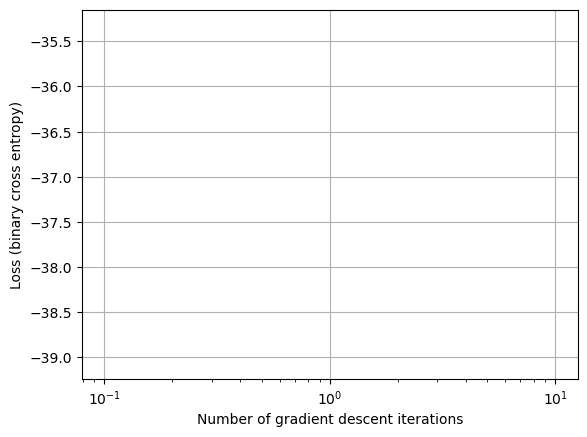

In [126]:
plt.plot(torch.arange(1, len(loss_vec)+1), loss_vec, color = "black")
plt.semilogx()
plt.grid(True)
labs = plt.gca().set(xlabel = "Number of gradient descent iterations", ylabel = "Loss (binary cross entropy)")

In this graph, we can see that as we increase the number of gradient descent optimizer iterations, the graph flattens out to reach convergence.

In [127]:
from GDO import LogisticRegression

LRO = LogisticRegression()

GDO_predict = (1.0 * (LRO.predict(X_train) == y_train)).mean()
print("Prediction Accuracy with Gradient Descent Optimizer Training Data: ", float(GDO_predict))

TypeError: 'int' object is not callable

### Running Gradient Descent on Testing Data

In [ ]:
from GDO import LogisticRegression

LRO = LogisticRegression()
# need to change x and y test to tensors for this to work, copy code from x_train and y_train from above


GDO_predict = (1.0 * (LRO.predict(X_test) == y_test)).mean()
print("Prediction Accuracy with Gradient Descent Optimizer Testing Data: ", float(GDO_predict))

TypeError: 'int' object is not callable

# Decision Tree Classifier Model Prediction Score

In [ ]:
from sklearn.tree import DecisionTreeClassifier

score_counter = 0
for i in range(1, 50):  
    DTC = DecisionTreeClassifier(max_depth= i)
    cv_scores= cross_val_score(DTC, X_train, y_train, cv= 5)
    if(cv_scores.mean() > score_counter):
        score_counter = cv_scores.mean()

print("Best score: " , score_counter)
print("Best depth: " , i)



Best score:  0.43076923076923085
Best depth:  49


# Random Forest Classifier Prediction Score


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2857142857142857


\begin{aligned}
    \mathbf{w}_{k+1} \gets \mathbf{w}_k - \alpha \nabla L(\mathbf{w}_k) + \beta(\mathbf{w}_k - \mathbf{w}_{k-1})
\end{aligned}
\tag{1}